1) Load data from "Live_20210128.csv" file. Remove unwanted features if required.

In [18]:
import numpy
import pandas

reactions = pandas.read_csv("Live_20210128.csv")
reactions_clean = reactions.drop(columns=["Column1","Column2","Column3","Column4"])
## The status type might be important. We will utilize the conversion from text to number, considering  video = 1 and photo = 0
## print(reactions_clean['status_type'].unique())
reactions_clean['status_type'] = reactions_clean['status_type'].map({'video': 0.1, 'photo': 0.2, 'status': 0.3, 'link':0.4})
## print(reactions_clean['status_type'].unique())
reactions_clean.shape
reactions_clean.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,0.1,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,0.2,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,0.1,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,0.2,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,0.2,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


2) Select the optimum k value using Silhouette Coefficient and plot the optimum k values.

best silhouette value=0.8721923040465606 found on k=2


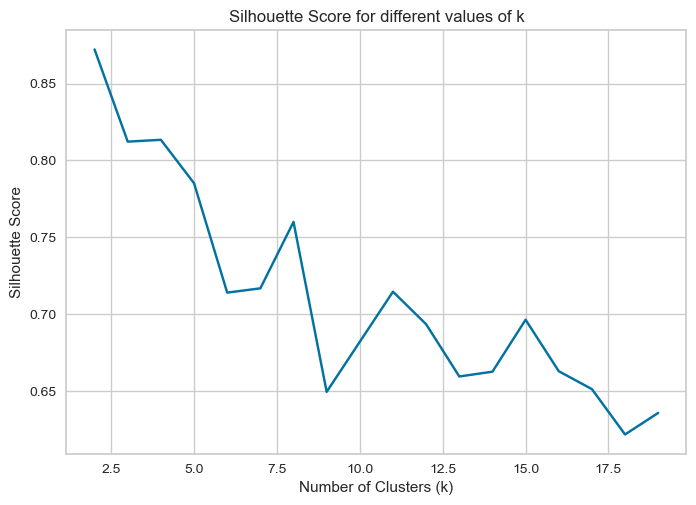

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt


# Select relevant numerical columns for clustering
cluster_features = ['status_type', 'num_reactions', 'num_comments',
                    'num_shares', 'num_likes', 'num_loves',
                    'num_wows', 'num_hahas', 'num_sads']

# Standardize the data
cluster_features_clean = pandas.DataFrame(reactions_clean[cluster_features])
range_n_clusters = list(range(2,20)) 

# List to hold the silhouette score for each k
sil_scores = []

optimum = {
'max_silhuette' : 0,
'kmeans': None,
'n_clusters' : 0 }



for n_clusters in range_n_clusters:
   cluster = KMeans(n_clusters=n_clusters, n_init='auto').fit(cluster_features_clean)
   label = cluster.labels_
   sil_score = silhouette_score(cluster_features_clean,label, metric= 'euclidean') 
   sil_scores.append(sil_score)
   if sil_score > optimum['max_silhuette']:
       optimum['max_silhuette'] = sil_score
       optimum['kmeans'] = cluster
       optimum['n_clusters'] = n_clusters

print(f"best silhouette value={optimum['max_silhuette']} found on k={optimum['n_clusters']}")
# Plot Silhouette Score 
plt.plot(range_n_clusters, sil_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of k')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
